# Связь биномиального распределения с нормальным

### Цель: посмотреть, при каком количестве наблюдений в эксперименте вместо биномиального распределения можно использовать нормальное

In [89]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np
from numpy.random import binomial
from numpy.random import normal

## Сгенерируем семпл данных

Сгенерируем точки из биномиального распределения: N=20 точек с вероятностью P=0.1 успеха.

In [90]:
P = 0.1  # convertion rate
N = 20   # sample size

In [91]:
sample = binomial(1, P, N)
print('sample: %s' % sample)
print('mean: %s' % np.mean(sample))

sample: [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
mean: 0.05


## Оценим параметры распределения

Проведем M=1000 таких экспериментов.

In [92]:
M = 1000  # number of experiments

In [93]:
experiments = binomial(1, P, (M, N))
print('experiemnts shape: %sх%s' % experiments.shape)

experiemnts shape: 1000х20


In [94]:
# TODO: оценить среднее для каждого эксперимента
Means = [experiment.mean() for experiment in experiments]

In [95]:
# TODO: оценить дисперсию средних
np.std(Means)

0.06782116188919209

## Оценим зависимость дисперсии от числа наблюдений (в одном эксперименте)

**Мы должны увидеть, что дисперсия убывает при увеличении N. Потому что дисперсия выборочного среднего равна $\sigma^2/N,$ где $\sigma^2 = P(1 - P)$ - дисперсия одного наблюдения.**

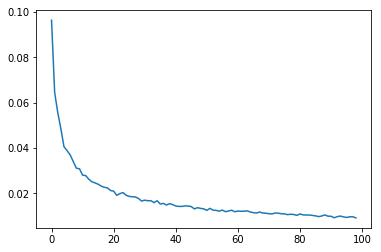

In [96]:
# TODO: построить график зависимости дисперсии от числа наблюдений
Stds = []

for N in np.arange(10,1000,10):
    experiments = binomial(1, P, (M, N))
    
    Means = [experiment.mean() for experiment in experiments]
    std = np.std(Means)
    Stds.append(std)
    
plt.plot(Stds)

## Сравним распределение средних с нормальным
(хотим понять, насколько хорошо наше биномиальное распределние приближается нормальным)

**Такие mean и std должны теоретически получиться у нормального закона при достаточно большом N**

In [97]:
# https://en.wikipedia.org/wiki/Bernoulli_distribution
mean = P
std = np.sqrt(P * (1 - P) / N)

0.09992424242424244 0.00922368664178208


Text(0.5, 1.0, 'Fit results: m = 0.10,  std = 0.01')

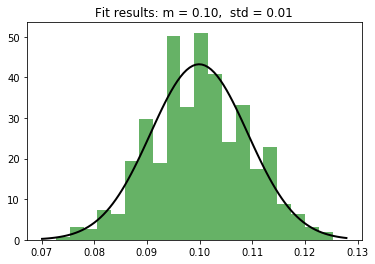

In [101]:
# TODO: сравнить распределение с нормальным

# Fit a normal distribution to the data:
m, std = np.mean(Means), np.std(Means) #среднее и дисперсия у исходного бин.распределения и у нормального (которым приближаем) одинаковая

# Plot the histogram.
plt.hist(Means, bins=20, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, m, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: m = %.2f,  std = %.2f" % (m, std)
plt.title(title)

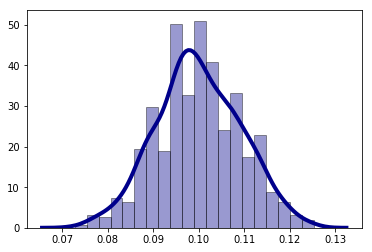

In [106]:
sns.distplot(Means, hist=True, kde=True,
             bins=20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

## Доверительный интервал

Доверительный интервал для истинного значения вероятности P.

In [99]:
confidence = 0.975 #по 0.025 с каждой стороны, то есть вероятность попадания в интервал 95%.
z = st.norm.ppf(confidence) #квантиль уровня 0.975
margin = z * std #формула из статистики - отступ
print('z: %s' % z)
print('margin: %s' % m)
print('interval: %s %s' % (P - margin, P + margin))

z: 1.959963984540054
margin: 0.09992424242424244
interval: 0.08192190637742393 0.11807809362257608


**Должна быть примерно 0.05**

In [100]:
# TODO: оценить долю средних, вышедших за границы доверительного интервала в эксперименте
MeansArr = np.array(Means)
len(MeansArr[(MeansArr < P - margin) | (MeansArr > P + margin)]) / len(MeansArr)

0.056